# Token lengths analysis

## Read bed files

In [1]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files')

bedDfList = []
for bedFile in os.listdir(bedDir):
    bedDfList.append(pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score']))

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score
0,1,0,6,TTTTCTT,0.000520
1,1,7,9,ACC,-0.003003
2,1,10,13,GACA,0.007947
3,1,14,18,AGAAT,-0.005417
4,1,19,25,TAATTAT,0.005031
...,...,...,...,...,...
2022283,39,75,81,TTTACTT,-0.029290
2022284,39,82,89,TTGTAAAT,-0.018211
2022285,39,90,92,GAG,-0.026377
2022286,39,93,98,CATTTG,-0.018669


## Calculate contig lengths

In [2]:
bedDf['token_length'] = (bedDf.end_position - bedDf.start_position)
bedDf

,contig_id,start_position,end_position,tokens,score,token_length
0,1,0,6,TTTTCTT,0.000520,6
1,1,7,9,ACC,-0.003003,2
2,1,10,13,GACA,0.007947,3
3,1,14,18,AGAAT,-0.005417,4
4,1,19,25,TAATTAT,0.005031,6
...,...,...,...,...,...,...
2022283,39,75,81,TTTACTT,-0.029290,6
2022284,39,82,89,TTGTAAAT,-0.018211,7
2022285,39,90,92,GAG,-0.026377,2
2022286,39,93,98,CATTTG,-0.018669,5


## Plot

<Axes: xlabel='token_length', ylabel='Count'>

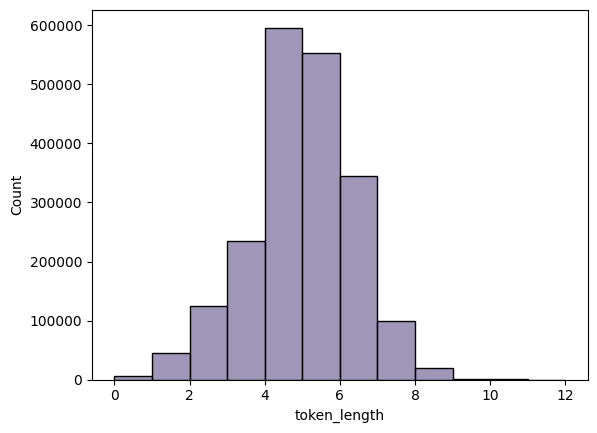

In [3]:
import seaborn as sns


sns.histplot(data=bedDf, x='token_length', binwidth=1, color='#8174A0')

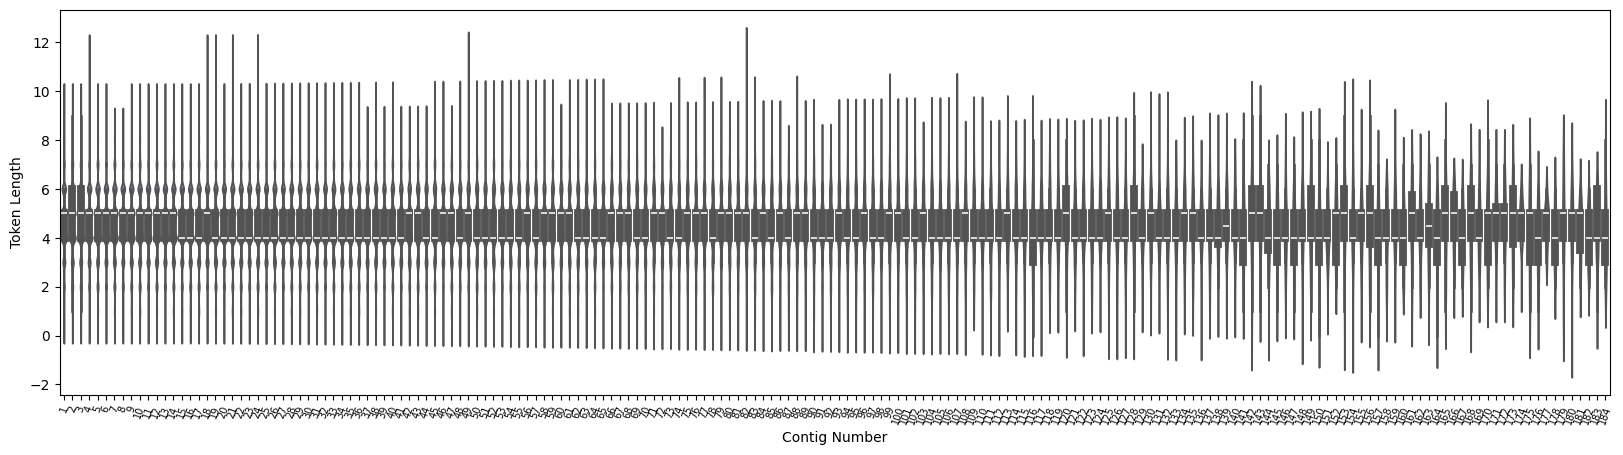

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize=(20,5))

ax = sns.violinplot(data=bedDf, x='contig_id', y='token_length', color='#8174A0')

plt.xlabel('Contig Number')
plt.xticks(fontsize=7, rotation=70)
plt.ylabel('Token Length')

plt.show()

<Axes: xlabel='token_length', ylabel='contig_id'>

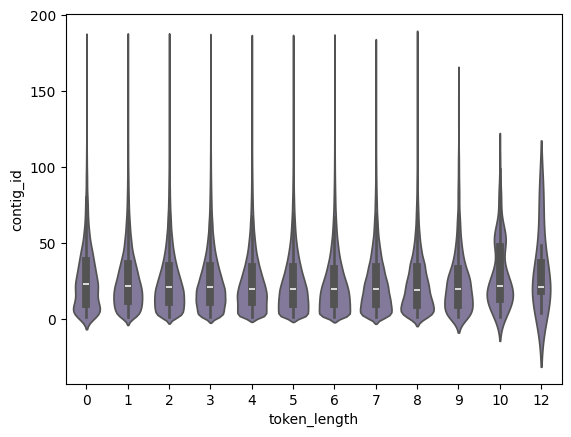

In [6]:
import seaborn as sns


sns.violinplot(data=bedDf, x='token_length', y='contig_id', color='#8174A0')